In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.cm as cm

In [2]:
def convolve2d(image, kernel):
    # This function which takes an image and a kernel 
    # and returns the convolution of them
    # Args:
    #   image: a numpy array of size [image_height, image_width].
    #   kernel: a numpy array of size [kernel_height, kernel_width].
    # Returns:
    #   a numpy array of size [image_height, image_width] (convolution output).
    
    kernel = np.flipud(np.fliplr(kernel))    # Flip the kernel
    output = np.zeros_like(image)            # convolution output
    # Add zero padding to the input image
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image
    for x in range(image.shape[1]):     # Loop over every pixel of the image
        for y in range(image.shape[0]):
            # element-wise multiplication of the kernel and the image
            output[y,x]=(kernel*image_padded[y:y+3,x:x+3]).sum()        
    return output

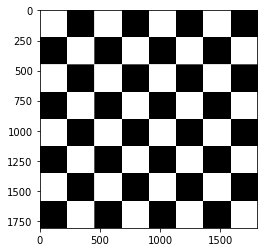

In [3]:
img = cv2.imread("chess.jpg",0)
plt.imshow(img,cmap = cm.gray)

#### Vertical edge

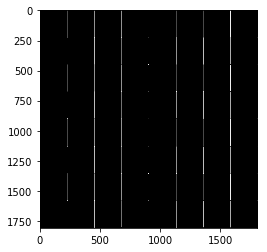

In [4]:
kernel = np.array([[1000,0,-1000],[1000,0,-1000],[1000,0,-1000]])
vertical_edges2 = convolve2d(img,kernel)
plt.imshow(vertical_edges2,cmap = cm.gray)

#### Horizontal Edge

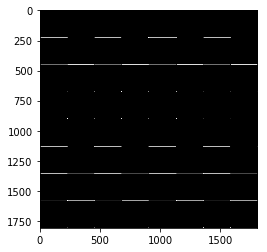

In [5]:
kernel2 = np.array([[-1000,-1000,-1000],[0,0,0],[1000,1000,1000]])
horizontal_edges2 = convolve2d(img,kernel2)
plt.imshow(horizontal_edges2,cmap = cm.gray)

#### Addition of vertical and horizontal

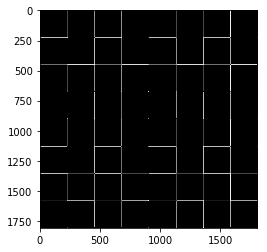

In [6]:
sum = np.add(vertical_edges2,horizontal_edges2)
plt.imshow(sum,cmap = cm.gray)

#### Edge detector

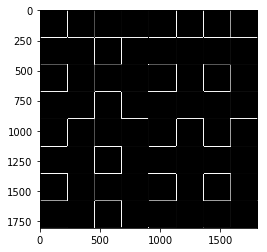

In [7]:
kernel3 = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
edge = convolve2d(img,kernel3)
plt.imshow(edge,cmap = cm.gray)

#### Edge detector (more intense)

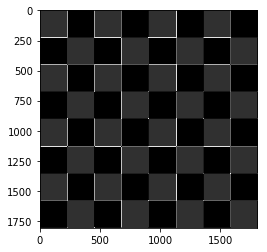

In [8]:
kernel4 = np.array([[-10,-10,-10],[-10,800,-10],[-10,-10,-10]])
edge = convolve2d(img,kernel4)
plt.imshow(edge,cmap = cm.gray)

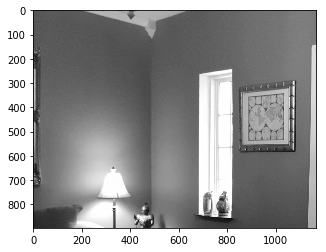

In [9]:
img1 = cv2.imread("greyscale.jpg")
gray_image = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image,cmap = cm.gray)

#### sharpening image

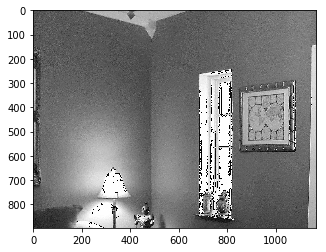

In [10]:
kernel5 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
edge1 = convolve2d(gray_image,kernel5)
plt.imshow(edge1,cmap = cm.gray)